## load package

In [101]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.linear_model import LogisticRegression # LogisticRegression
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,recall_score, precision_score, f1_score # evaluation metric
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # evaluation metric
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn import metrics

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from termcolor import colored as cl # text customization
import itertools # advanced tools

In [102]:
data_path = '/Users/Zhang/notebooks/Amgen DS Challenge/output/'
image_path = '/Users/Zhang/notebooks/Amgen DS Challenge/figures/'

## Load data

In [103]:
train_df = pd.read_csv(data_path + 'train1.csv')
test_df = pd.read_csv(data_path + 'test1.csv')

In [104]:
print('train_df')
train_df.head() 
train_df.info()
train_df.shape

train_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64384 entries, 0 to 64383
Columns: 114 entries, hospital_death to h_wbc_max
dtypes: float64(100), int64(7), object(7)
memory usage: 56.0+ MB


(64384, 114)

In [105]:
print('test_df')
train_df.head() 
train_df.info()
train_df.shape

test_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64384 entries, 0 to 64383
Columns: 114 entries, hospital_death to h_wbc_max
dtypes: float64(100), int64(7), object(7)
memory usage: 56.0+ MB


(64384, 114)

For supervised learning classification problem target variable is hospital_death.

In [106]:
train_df['hospital_death'].dtype

dtype('int64')

## Encode Categoricals variables

In [107]:
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'bodysystem_diagnosis_admit']


In [108]:
cat_train_df = train_df.select_dtypes(include='object')
cat_train_df.head()
cat_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64384 entries, 0 to 64383
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ethnicity                   63118 non-null  object
 1   gender                      64369 non-null  object
 2   hospital_admit_source       48431 non-null  object
 3   icu_admit_source            64303 non-null  object
 4   icu_stay_type               64384 non-null  object
 5   icu_type                    64384 non-null  object
 6   bodysystem_diagnosis_admit  63234 non-null  object
dtypes: object(7)
memory usage: 3.4+ MB


In [109]:
train_df = train_df.drop(['hospital_id','icu_id','readmission_status','ethnicity',\
'gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type'], axis=1)

In [110]:
test_df = test_df.drop(['hospital_id','icu_id','readmission_status','ethnicity',\
'gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type'], axis=1)

In [111]:
train_df.shape

(64384, 105)

In [112]:
test_df.shape

(27329, 105)

In [113]:
def display_columns_uniqvals(df):
    for i, col in enumerate(df.columns.tolist()):
         print('\n ({} {}) Uniq: {} UniqSz: {}'.format(i,col, df[col].unique(),df[col].unique().size ))
    print('\n')

In [114]:
display_columns_uniqvals(train_df)


 (0 hospital_death) Uniq: [1 0] UniqSz: 2

 (1 patient_id) Uniq: [     1      3      6 ... 131048 131049 131051] UniqSz: 64384

 (2 d_diasbp_min) Uniq: [49. 54. 55. 50. 44. 48. 39. 60. 45. 42. 58. 33. 37. 72. 47. 30. 69. 17.
 46. 90. 35. 32. 51. 38. 43. 56. 34. 77. 61. 82. 57. 71. 80. 66. 62. 78.
 74. 88. 41. 65. 63. 53. 73. 59. 67. 40. 31. 68. 27. 76. 64. 52. 36. 75.
 21. 19. 15. 81. 70. 23. 83. 28. 26. 86. 18. 16. 89. 29. nan 79. 13. 24.
 25. 85. 84. 22. 20. 87. 14.] UniqSz: 79

 (3 h_diasbp_min) Uniq: [ 49.  54.  52.  74.  56.  53.  77.  39.  60.  48.  55.  73.  84.  80.
  38.  47.  46.  61.  62.  72.  42.  nan  50.  70.  67.  51.  69. 109.
  89.  68.  57.  71.  63.  44.  86.  59.  94.  66.  65.  64.  91.  79.
 113. 108.  41.  75.  92.  82.  40.  37.  43.  88.  76.  58.  90.  30.
 104.  98.  35.  45.  87.  81. 102.  22.  83.  78.  97.  36.  28.  31.
 106.  93.  95.  29. 107. 103. 101.  85.  99.  27. 110.  34.  32. 100.
  96.  25.  26.  33. 105.  23. 111.  24. 112.] UniqSz: 93

 (4 

In [115]:
## split data

from sklearn.model_selection import train_test_split

train = train_df.copy()

y = train['hospital_death']

X = train.drop(['hospital_death'], axis=1).select_dtypes(exclude=['object'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [116]:
X.shape

(64384, 103)

In [117]:
X_valid.shape

(12877, 103)

In [118]:
X_train.shape

(51507, 103)

In [119]:
test = test_df.drop(labels='hospital_death', axis=1).copy()

# To keep things simple, we'll use only numerical predictors

X_test = test.select_dtypes(exclude=['object'])

X_test.shape
X_test.head()

,patient_id,d_diasbp_min,h_diasbp_min,d_diasbp_noninvasive_min,h_diasbp_noninvasive_min,d_heartrate_min,h_heartrate_min,d_mbp_min,h_mbp_min,d_mbp_noninvasive_min,...,d_hematocrit_max,h_hematocrit_max,d_platelets_max,h_platelets_max,d_potassium_max,h_potassium_max,d_sodium_max,h_sodium_max,d_wbc_max,h_wbc_max
0,2,68.0,76.0,68.0,76.0,62.0,82.0,81.0,94.0,81.0,...,42.5,NaN,226.0,NaN,4.3,NaN,138.0,NaN,14.11,NaN
1,4,31.0,37.0,31.0,37.0,71.0,84.0,40.0,47.0,40.0,...,22.6,NaN,101.0,NaN,5.3,5.3,134.0,131.0,10.70,NaN
2,5,44.0,62.0,44.0,62.0,64.0,65.0,64.0,80.0,64.0,...,38.2,NaN,239.0,NaN,4.1,NaN,138.0,NaN,8.20,NaN
3,7,59.0,73.0,59.0,73.0,44.0,46.0,69.0,84.0,69.0,...,49.0,49.0,148.0,144.0,3.7,NaN,131.0,NaN,10.50,8.5
4,12,48.0,63.0,48.0,63.0,49.0,53.0,58.0,74.0,58.0,...,39.2,39.2,158.0,158.0,4.6,4.6,142.0,142.0,7.60,7.6


## Imputatoin

In [120]:
##from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [121]:
imputed_X_train.shape

(51507, 103)

In [122]:
y_train.shape

(51507,)

In [123]:
my_imputer = SimpleImputer()
imputed_X_test = pd.DataFrame(my_imputer.fit_transform(X_test))


# Imputation removed column names; put them back
imputed_X_test.columns = X_test.columns

In [124]:
imputed_X_test.shape

(27329, 103)

In [125]:
X_test.shape

(27329, 103)

## Machine Learning

In [181]:
#1. Decision Tree
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
smo = SMOTE()

X_train = imputed_X_train
X_valid = imputed_X_valid

X_smo, y_smo = smo.fit_resample(X_train, y_train)

tree_model = DecisionTreeClassifier(max_depth=4,splitter="best",min_samples_split=4,
                                    min_samples_leaf=4,max_features=None,class_weight = 'balanced')
tree_model.fit(X_smo, y_smo)
tree_yhat = tree_model.predict(X_valid)

In [182]:
# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from imblearn.over_sampling import SMOTE
smo = SMOTE()

X_train = imputed_X_train
X_valid = imputed_X_valid

X_smo, y_smo = smo.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=4, weights="distance",algorithm="kd_tree", leaf_size=45,p=1)
knn.fit(X_smo, y_smo )
knn_yhat = knn.predict(X_valid)

In [183]:
# 3. LR
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

smo = SMOTE()
X_train = imputed_X_train
X_valid = imputed_X_valid

lr = LogisticRegression(tol=1e-4)                                   
lr.fit(X_smo, y_smo )              

X_smo, y_smo = smo.fit_resample(X_train, y_train)
lr_yhat = lr.predict(X_valid)

In [184]:
# 4.  XGboosting
from xgboost import XGBClassifier # XGBoost algorithm
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
smo = SMOTE()

X_train = imputed_X_train
X_valid = imputed_X_valid

X_smo, y_smo = smo.fit_resample(X_train, y_train)

xgb = XGBClassifier(max_depth=7,scale_pos_weight=3,n_estimators=200,subsample=0.9,
                        colsample_bytree=0.9,learning_rate=0.25,alpha=1.5,reg_lambda=1.5,class_weight = 'balanced')

xgb.fit(X_smo, y_smo )
xgb_yhat = xgb.predict(X_valid)

[17:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Model Evaluation

In [ ]:
## K-folds cross-validation
from sklearn.metrics import accuracy_score

In [185]:
# Perform cross-validation

scores = cross_val_score(tree_model, X_train, y_train, scoring='accuracy', cv=5)
# report performance
mean_score=np.mean(np.asarray(scores))
print(mean_score)

0.7989008385925706


In [186]:
# Perform cross-validation

scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
# report performance
mean_score=np.mean(np.asarray(scores))
print(mean_score)

0.9156425244105069


In [187]:
# Perform cross-validation

scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=5)
# report performance
mean_score=np.mean(np.asarray(scores))
print(mean_score)

0.9205544898214303


In [91]:
# Perform cross-validation

scores = cross_val_score(xgb, X_train, y_train, scoring='accuracy', cv=5)
# report performance
mean_score=np.mean(np.asarray(scores))
print(mean_score)

[00:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Classification report 

In [29]:
print(metrics.classification_report(y_valid, tree_yhat))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     11821
           1       0.29      0.54      0.38      1056

    accuracy                           0.85     12877
   macro avg       0.62      0.71      0.65     12877
weighted avg       0.90      0.85      0.87     12877



In [35]:
print(metrics.classification_report(y_valid, knn_yhat))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     11821
           1       0.14      0.33      0.20      1056

    accuracy                           0.78     12877
   macro avg       0.54      0.58      0.54     12877
weighted avg       0.87      0.78      0.82     12877



In [36]:
print(metrics.classification_report(y_valid, lr_yhat))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     11821
           1       0.18      0.71      0.29      1056

    accuracy                           0.71     12877
   macro avg       0.57      0.71      0.55     12877
weighted avg       0.90      0.71      0.78     12877



In [38]:
print(metrics.classification_report(y_valid, xgb_yhat))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11821
           1       0.54      0.41      0.47      1056

    accuracy                           0.92     12877
   macro avg       0.74      0.69      0.71     12877
weighted avg       0.91      0.92      0.92     12877



ROC AUC curve

In [156]:
def plot_roc_curve(y_true, y_proba):
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt
    fpr,tpr,threshold = roc_curve(y_true,y_proba, pos_label=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('roc curve')
    plt.plot(fpr, tpr, color = 'b', linewidth = 0.8)
    plt.plot([0,1],[0,1],'r--')

In [179]:
y_predict = tree_model.predict_proba(imputed_X_valid)[:, 1] 
roc_auc_score(y_valid, y_predict)

0.8377953302161278

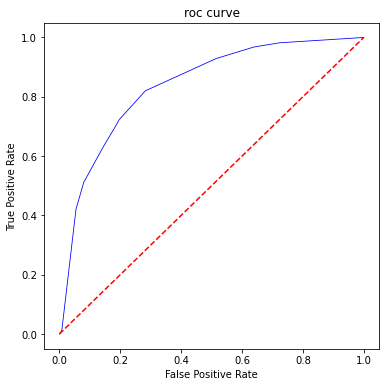

In [180]:
plot_roc_curve(y_valid, y_predict)

In [177]:
y_predict = knn.predict_proba(imputed_X_valid)[:, 1] 
roc_auc_score(y_valid, y_predict)

0.6139995783056861

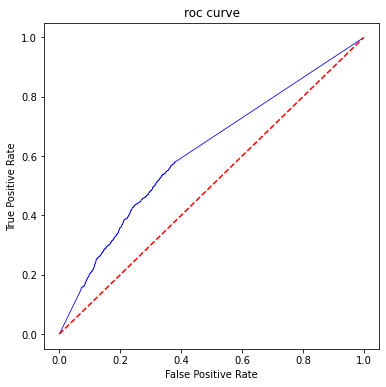

In [178]:
plot_roc_curve(y_valid, y_predict)

In [172]:
y_predict = xgb.predict_proba(imputed_X_valid)[:, 1] 
roc_auc_score(y_valid, y_predict)

0.8771437996836651

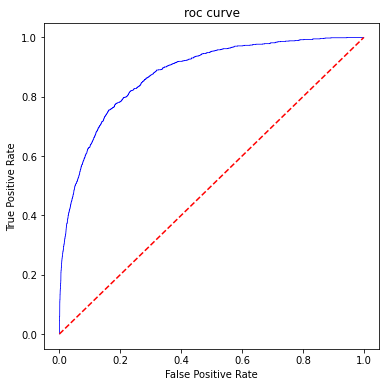

In [173]:
plot_roc_curve(y_valid, y_predict)

In [174]:
y_predict = lr.predict_proba(imputed_X_valid)[:, 1]
roc_auc_score(y_valid, y_predict)

0.7928693446178219

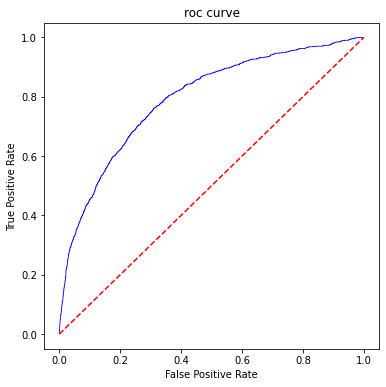

In [175]:
plot_roc_curve(y_valid, y_predict)

Accuracy score Accuracy score = No.of correct predictions / Total no.of predictions

In [39]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_valid, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_valid, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_valid, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the LogisticRegression model is {}'.format(accuracy_score(y_valid, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

print(cl('RECALL SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Decision Tree model is {}'.format(recall_score(y_valid, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the KNN model is {}'.format(recall_score(y_valid, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the XGBoost model is {}'.format(recall_score(y_valid, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the LogisticRegression model is {}'.format(recall_score(y_valid, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.8529160518754368
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.7817814708394812
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9224974761202144
------------------------------------------------------------------------
Accuracy score of the LogisticRegression model is 0.7131319406694105
------------------------------------------------------------------------
RECALL SCORE
------------------------------------------------------------------------
Recall score of the Decision Tree model is 0.5416666666666666
------------------------------------------------------------------------
Recall score of the KNN model is 0.33049242424242425
------------------------------------------------------------------------
Recall score of the XGBoost 

F1 Score F1 score = 2( (precision * recall) / (precision + recall) )

Confusion Matrix

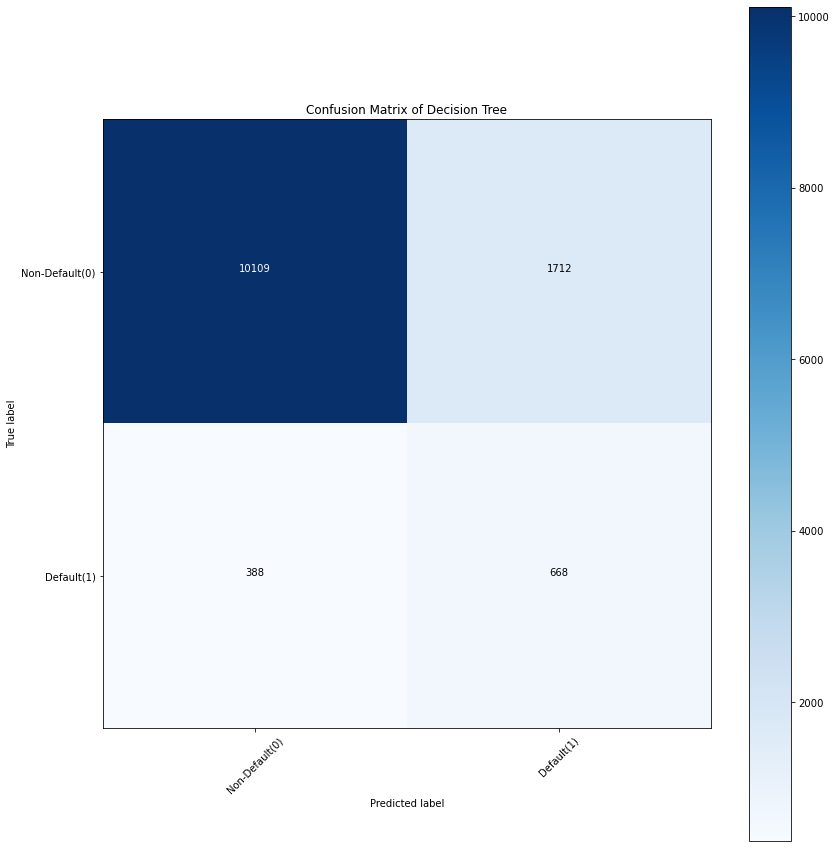

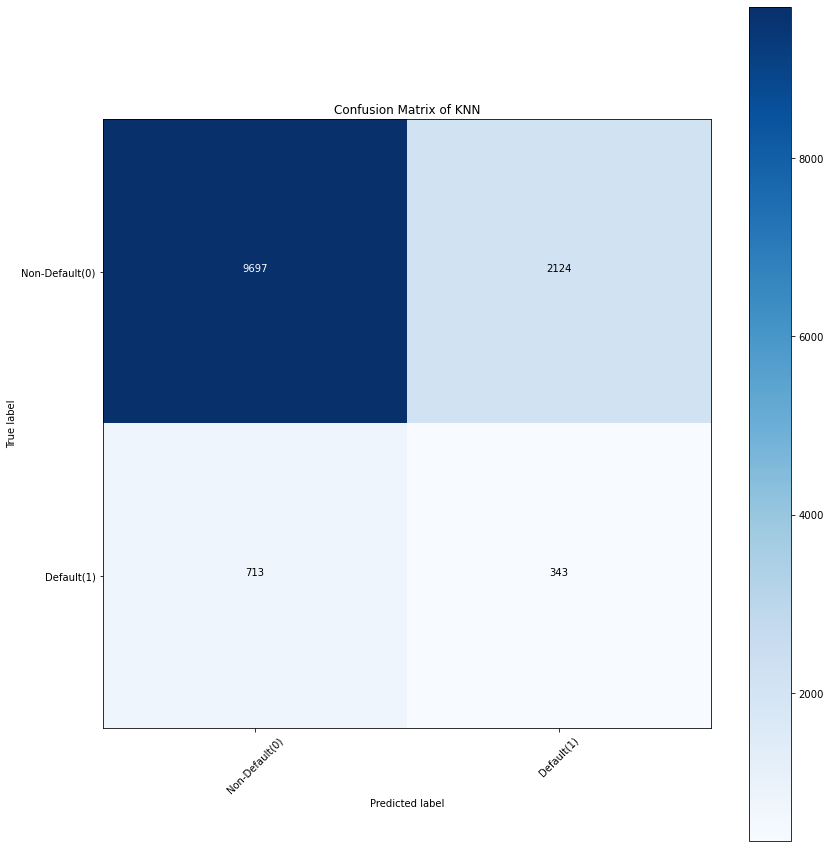

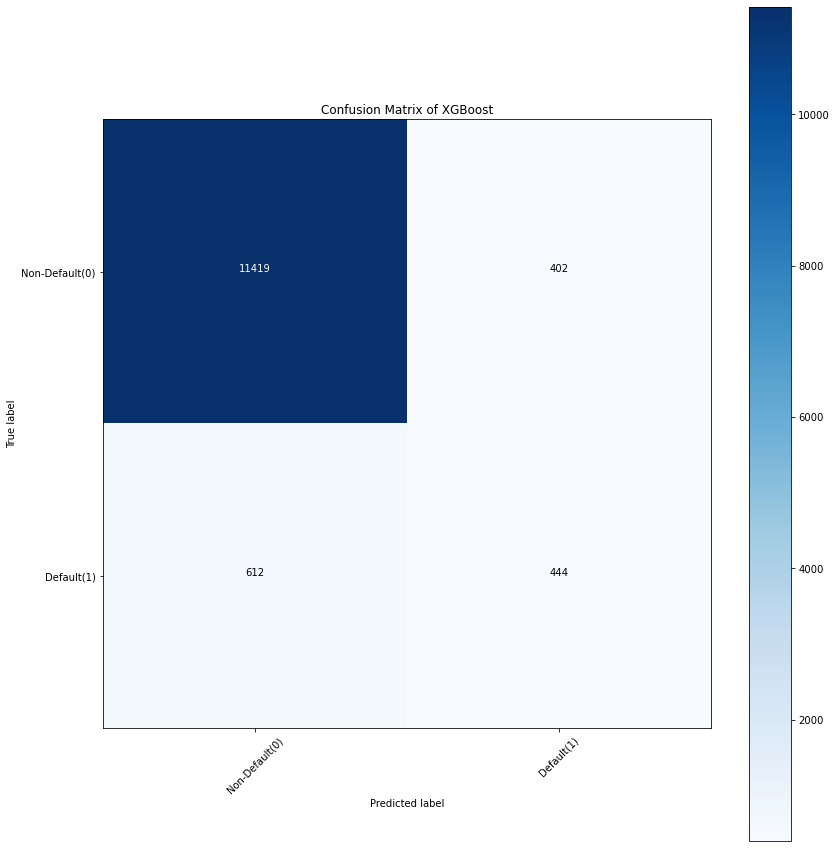

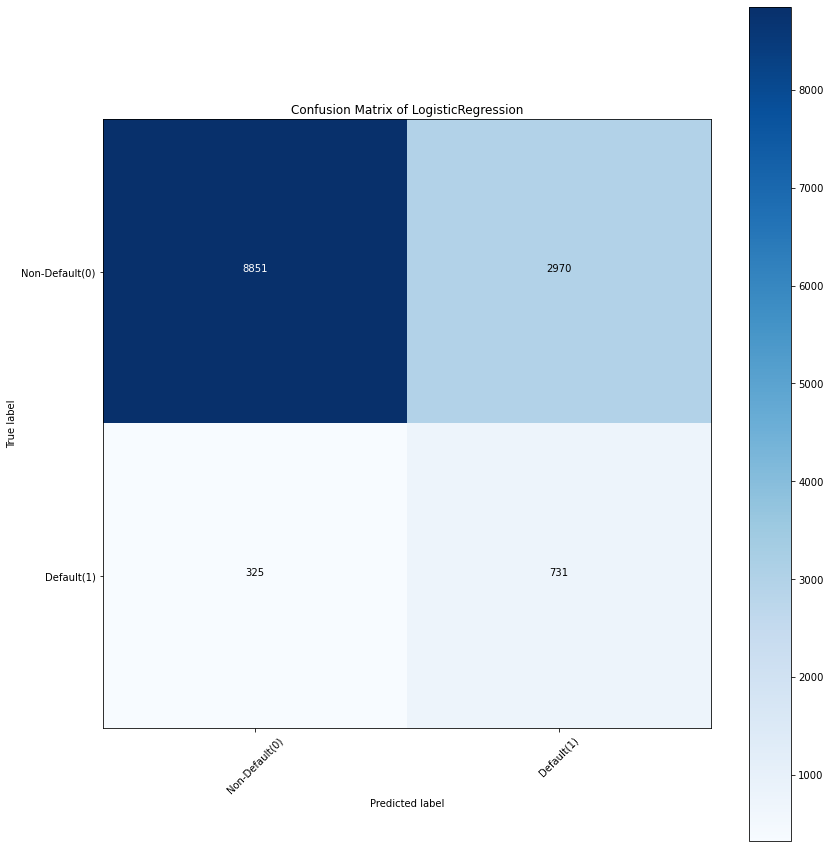

In [130]:
#Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(6*2, 6*2))    # 8, 6
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_valid, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_valid, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
xgb_matrix = confusion_matrix(y_valid, xgb_yhat, labels = [0, 1]) # XGBoost
lr_matrix = confusion_matrix(y_valid, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')


# 4. Logistic Regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'LogisticRegression')
plt.savefig('lr_cm_plot.png')

## Predict outcome

In [45]:
y_predict = tree_model.predict_proba(imputed_X_test)
death_predict = tree_model.predict(imputed_X_test)

output_tree = pd.DataFrame({'patient_id': test.patient_id,
                            'morality probability':y_predict[:,0],
                            'death probability': y_predict[:, 1],
                            'hospital_death': death_predict}, dtype=np.int32)
 
output_tree.to_csv('submission_Tree.csv', index=False)
output_tree.head()

,patient_id,morality probability,death probability,hospital_death
0,2,0.991098,0.008902,0
1,4,0.747501,0.252499,0
2,5,0.508907,0.491093,0
3,7,0.991098,0.008902,0
4,12,0.826536,0.173464,0


In [46]:
y_predict = knn.predict_proba(imputed_X_test)
death_predict = knn.predict(imputed_X_test)

output_knn = pd.DataFrame({'patient_id': test.patient_id,
                           'morality probability': y_predict[:, 0],
                           'death probability': y_predict[:, 1],
                           'hospital_death': death_predict}, dtype=np.int32)
 
output_knn.to_csv('submission_knn.csv', index=False)
output_knn.head()

,patient_id,morality probability,death probability,hospital_death
0,2,1.000000,0.000000,0
1,4,0.760045,0.239955,0
2,5,1.000000,0.000000,0
3,7,1.000000,0.000000,0
4,12,1.000000,0.000000,0


In [47]:
y_predict = xgb.predict_proba(imputed_X_test)

death_predict = xgb.predict(imputed_X_test)

output_xgb = pd.DataFrame({'patient_id': test.patient_id,
                           'morality probability': y_predict[:, 0],
                           'death probability': y_predict[:, 1],
                           'hospital_death': death_predict}, dtype=np.int32)
 
output_xgb.to_csv('submission_xgb.csv', index=False)
output_xgb.head()

,patient_id,morality probability,death probability,hospital_death
0,2,0.999711,0.000289,0
1,4,0.896173,0.103827,0
2,5,0.865340,0.134660,0
3,7,0.997377,0.002623,0
4,12,0.999579,0.000421,0


In [48]:
y_predict = lr.predict_proba(imputed_X_test)
death_predict = lr.predict(imputed_X_test)

output_lr = pd.DataFrame({'patient_id': test.patient_id,
                           'morality probability': y_predict[:, 0],
                           'death probability': y_predict[:, 1],
                           'hospital_death': death_predict}, dtype=np.int32)
 
output_lr.to_csv('submission_lr.csv', index=False)
output_lr.head()

,patient_id,morality probability,death probability,hospital_death
0,2,0.743578,0.256422,0
1,4,0.089491,0.910509,1
2,5,0.742648,0.257352,0
3,7,0.838911,0.161089,0
4,12,0.856124,0.143876,0


## Feature Importance

Tuning a Regression Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit((X_smo, y_smo)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [51]:
xgb = XGBClassifier()
xgb.fit((X_smo, y_smo)

[16:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
def plot_feature_importance(importance,names,model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    df = pd.DataFrame(data)

    df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=df['feature_importance'], y=df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

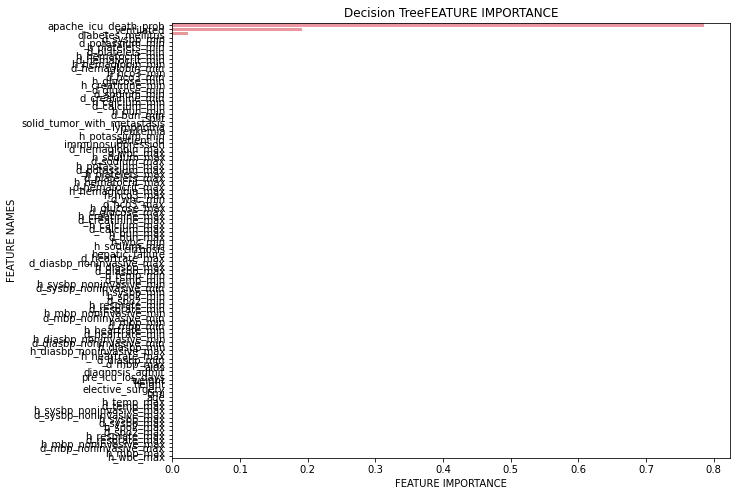

In [53]:
plot_feature_importance(tree_model.feature_importances_,X.columns,'Decision Tree')

In [70]:
df.head()

,feature_names,feature_importance
48,apache_icu_death_prob,0.785090
49,ventilated,0.191407
52,diabetes_mellitus,0.022786
15,d_sysbp_min,0.000717
13,d_spo2_min,0.000000


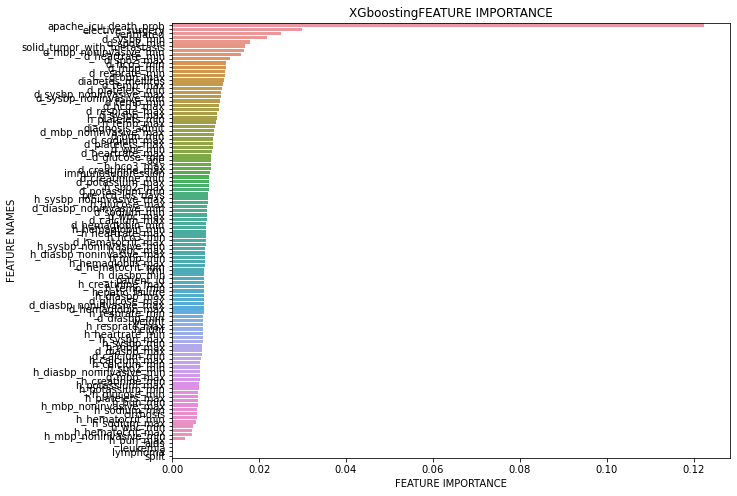

In [71]:
plot_feature_importance(xgb.feature_importances_,X.columns,'XGboosting')

In [72]:
df.head()

,feature_names,feature_importance
48,apache_icu_death_prob,0.785090
49,ventilated,0.191407
52,diabetes_mellitus,0.022786
15,d_sysbp_min,0.000717
13,d_spo2_min,0.000000


In [73]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
from sklearn import tree

export_graphviz(treeclf, out_file='tree.dot', feature_names=X.columns)

In [74]:
import pydotplus 

tree = tree.export_graphviz(treeclf, out_file=None) 
graph = pydotplus.graph_from_dot_data(tree) 
graph.write_jpg("tree1.jpg") 

True

## only four features are important
## select only four feature and re-run the data

In [76]:
features = ['apache_icu_death_prob','ventilated','diabetes_mellitus','d_sysbp_min']

In [79]:
## split data

from sklearn.model_selection import train_test_split

train = train_df.copy()

y = train['hospital_death']

X = train.drop(['hospital_death'], axis=1)[features]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [80]:
X.shape

(64384, 4)

In [81]:
X_valid.shape

(12877, 4)

In [82]:
X_train.shape

(51507, 4)

In [84]:
test = test_df.drop(labels='hospital_death', axis=1).copy()

# To keep things simple, we'll use only numerical predictors

X_test = test[features]

X_test.shape
X_test.head()

,apache_icu_death_prob,ventilated,diabetes_mellitus,d_sysbp_min
0,0.01,0.0,0.0,98.0
1,0.11,1.0,0.0,72.0
2,0.16,0.0,0.0,121.0
3,0.01,0.0,0.0,97.0
4,0.10,0.0,0.0,87.0


## Imputatoin

In [85]:
##from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [86]:
my_imputer = SimpleImputer()
imputed_X_test = pd.DataFrame(my_imputer.fit_transform(X_test))


# Imputation removed column names; put them back
imputed_X_test.columns = X_test.columns

In [87]:
X_test.shape

(27329, 4)

In [88]:
#1. Decision Tree
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
smo = SMOTE()

X_train = imputed_X_train
X_valid = imputed_X_valid

X_smo, y_smo = smo.fit_resample(X_train, y_train)

tree_model = DecisionTreeClassifier(max_depth=4,splitter="best",min_samples_split=4,
                                    min_samples_leaf=4,max_features=None,class_weight = 'balanced')
tree_model.fit(X_smo, y_smo)
tree_yhat = tree_model.predict(X_valid)

In [89]:
# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from imblearn.over_sampling import SMOTE
smo = SMOTE()

X_train = imputed_X_train
X_valid = imputed_X_valid

X_smo, y_smo = smo.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=4, weights="distance",algorithm="kd_tree", leaf_size=45,p=1)
knn.fit(X_smo, y_smo )
knn_yhat = knn.predict(X_valid)

In [90]:
# 3. LR
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

smo = SMOTE()
X_train = imputed_X_train
X_valid = imputed_X_valid

lr = LogisticRegression(tol=1e-4)                                   
lr.fit(X_smo, y_smo )              

X_smo, y_smo = smo.fit_resample(X_train, y_train)
lr_yhat = lr.predict(X_valid)

In [91]:
# 4.  XGboosting
from xgboost import XGBClassifier # XGBoost algorithm
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
smo = SMOTE()

X_train = imputed_X_train
X_valid = imputed_X_valid

X_smo, y_smo = smo.fit_resample(X_train, y_train)

xgb = XGBClassifier(max_depth=7,scale_pos_weight=3,n_estimators=200,subsample=0.9,
                        colsample_bytree=0.9,learning_rate=0.25,alpha=1.5,reg_lambda=1.5,class_weight = 'balanced')

xgb.fit(X_smo, y_smo )
xgb_yhat = xgb.predict(X_valid)

[16:49:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:49:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Classification report 2

In [92]:
print(metrics.classification_report(y_valid, tree_yhat))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11821
           1       0.24      0.73      0.36      1056

    accuracy                           0.79     12877
   macro avg       0.60      0.76      0.62     12877
weighted avg       0.91      0.79      0.83     12877



In [93]:
print(metrics.classification_report(y_valid, knn_yhat))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11821
           1       0.32      0.42      0.37      1056

    accuracy                           0.88     12877
   macro avg       0.64      0.67      0.65     12877
weighted avg       0.90      0.88      0.89     12877



In [94]:
print(metrics.classification_report(y_valid, lr_yhat))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     11821
           1       0.29      0.68      0.41      1056

    accuracy                           0.84     12877
   macro avg       0.63      0.77      0.66     12877
weighted avg       0.91      0.84      0.86     12877



In [95]:
print(metrics.classification_report(y_valid, xgb_yhat))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     11821
           1       0.30      0.56      0.39      1056

    accuracy                           0.86     12877
   macro avg       0.63      0.72      0.66     12877
weighted avg       0.90      0.86      0.88     12877



In [ ]:
## select top 4 features cannt improve the model, so chooose to report the prior outcomes